In [1]:
import biosppy
import numpy as np
import pyhrv.tools as tools
import pyhrv.time_domain as td 
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl
from opensignalsreader import OpenSignalsReader

In [2]:
# Load ECG signal & extract R-peaks using BioSppy
signal_1 = OpenSignalsReader('./subject_1.txt').signal('ECG')
signal_2 = OpenSignalsReader('./subject_2.txt').signal('ECG')
signal_3 = OpenSignalsReader('./subject_3.txt').signal('ECG')
signal_4 = OpenSignalsReader('./subject_4.txt').signal('ECG')

signal_1, rpeaks_1 = biosppy.signals.ecg.ecg(signal_1, show=False)[1:3]
signal_2, rpeaks_2 = biosppy.signals.ecg.ecg(signal_2*(-1), show=False)[1:3]
signal_3, rpeaks_3 = biosppy.signals.ecg.ecg(signal_3*(-1), show=False)[1:3]
signal_4, rpeaks_4 = biosppy.signals.ecg.ecg(signal_4*(-1), show=False)[1:3]

# Compute NNI
nni_1 = tools.nn_intervals(rpeaks_1)
nni_2 = tools.nn_intervals(rpeaks_2)
nni_3 = tools.nn_intervals(rpeaks_3)
nni_4 = tools.nn_intervals(rpeaks_4)


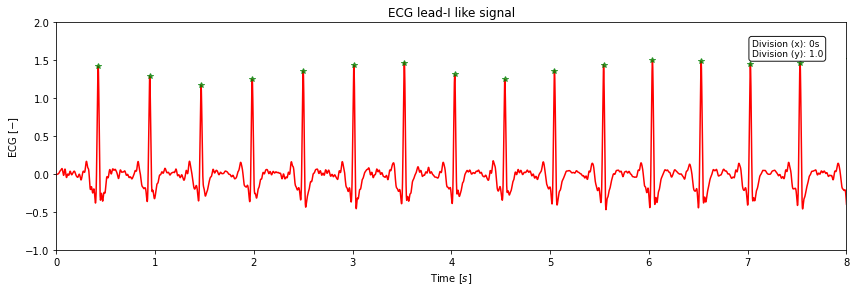

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [3]:
# Compute NNI
nni_1 = tools.nn_intervals(rpeaks_1)

# Plot the ECG signal (interval: 0s to 15s)
tools.plot_ecg(signal_1, interval=[0, 8])


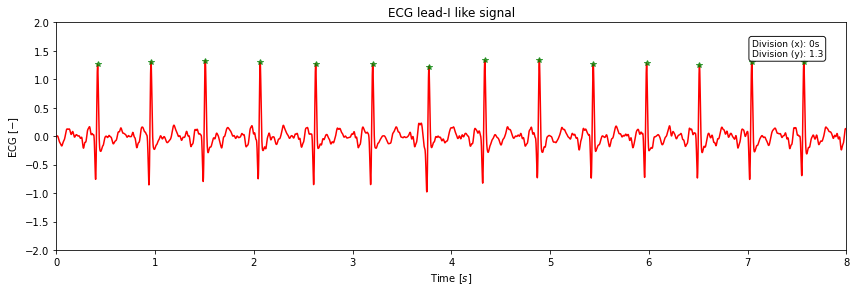

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [4]:
# Compute NNI
nni_2 = tools.nn_intervals(rpeaks_2)

# Plot the ECG signal (interval: 0s to 15s)
tools.plot_ecg(signal_2, interval=[0, 8])

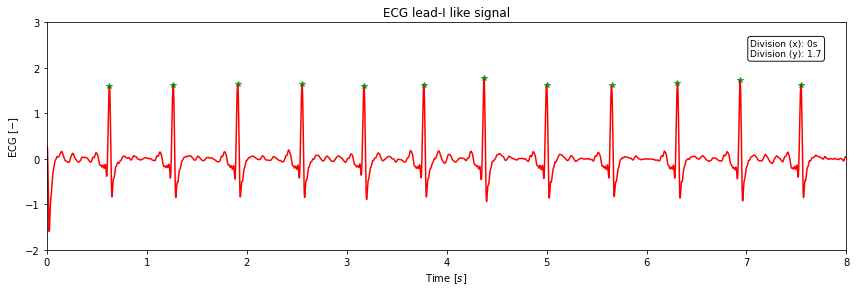

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [5]:
# Compute NNI
nni_3 = tools.nn_intervals(rpeaks_3)

# Plot the ECG signal (interval: 0s to 15s)
tools.plot_ecg(signal_3, interval=[0, 8])

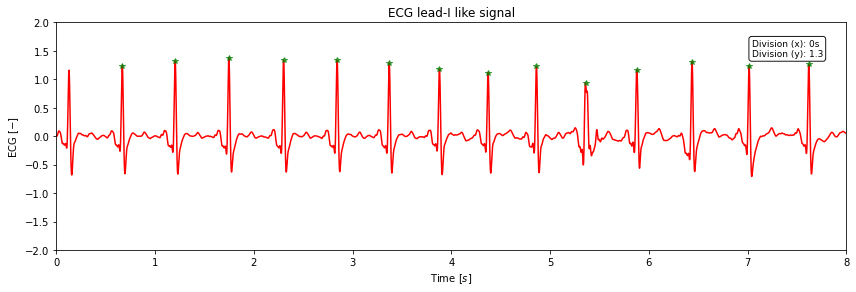

ReturnTuple(ecg_plot=<Figure size 864x288 with 1 Axes>)

In [6]:
# Compute NNI
nni_4 = tools.nn_intervals(rpeaks_4)

# Plot the ECG signal (interval: 0s to 15s)
tools.plot_ecg(signal_4, interval=[0, 8])

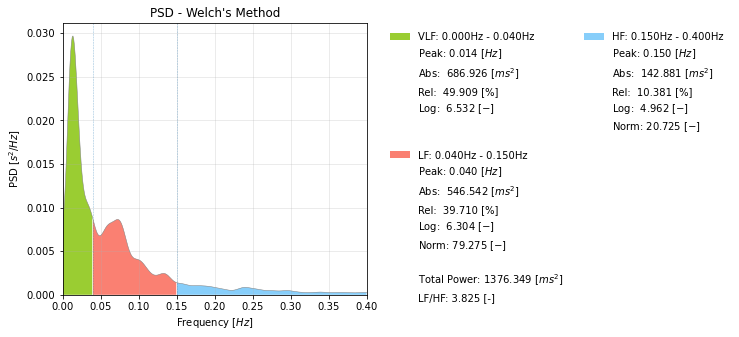

In [7]:
# Compute the PSD and frequency domain parameters
result_psd_1 = fd.welch_psd(nni=nni_1)

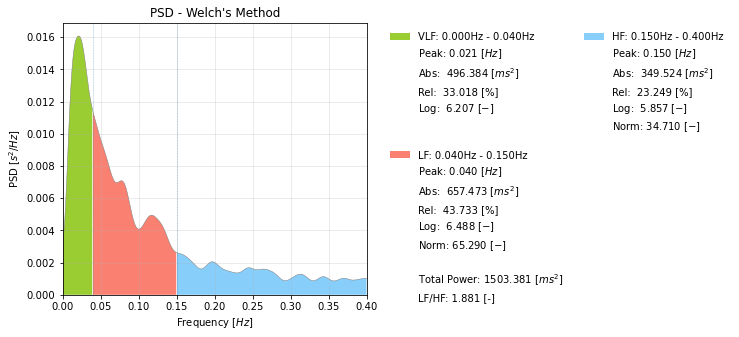

In [8]:
result_psd_2 = fd.welch_psd(nni=nni_2)

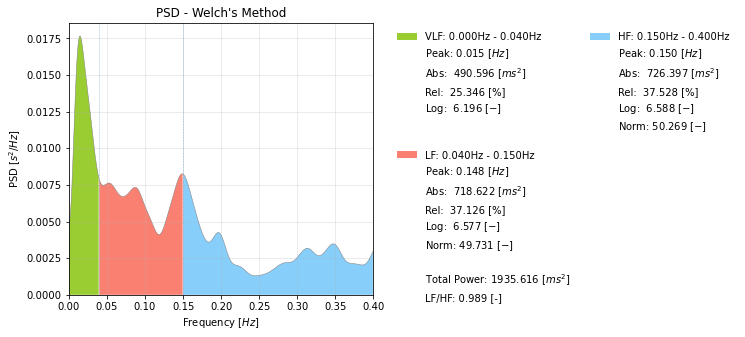

In [9]:
result_psd_3 = fd.welch_psd(nni=nni_3)

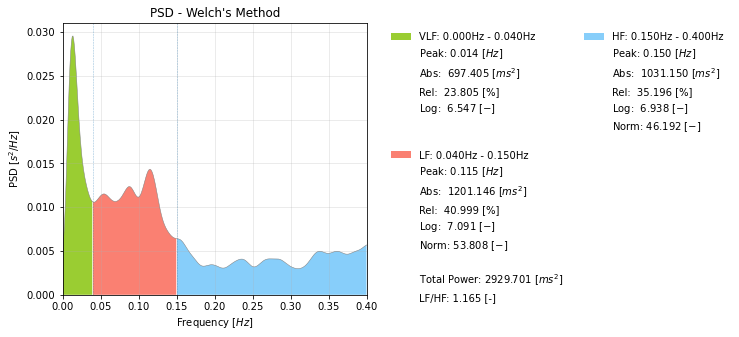

In [10]:
result_psd_4 = fd.welch_psd(nni=nni_4)

Все значения TP лежат в "зеленой зоне". Так как результаты 4-ого человека лежат во второй половине, преположим, что именно он самый здоровый. Однако его значение уже близко к перенапряжению. 

По LH/HF можно сказать только то, что первый человек выходит за пределы зеленой зоны, но так как мы не знаем, в какое время дня проводились измерения, никаких выводов из этого сделать нельзя.

По уровню стресса (LF) все испытыемые находятся в зеленой зоне.

### Рассмотрим гистограммы.

C:\Users\ada\Anaconda3\envs\mne\lib\site-packages\pyhrv\time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


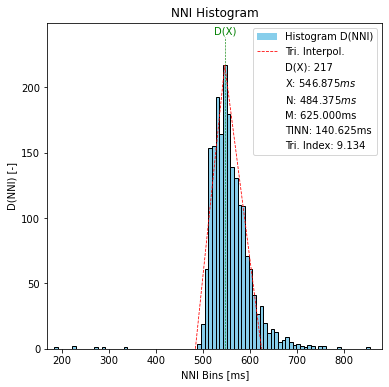

In [11]:
result_1 = td.time_domain(nni_1)

In [12]:
result_1['rmssd']

21.664238334518963

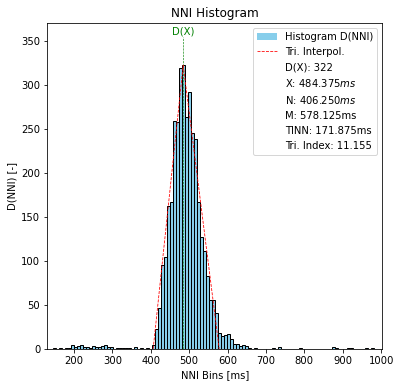

In [13]:
result_2 = td.time_domain(nni_2)

In [14]:
result_2['rmssd']

38.593440298646776

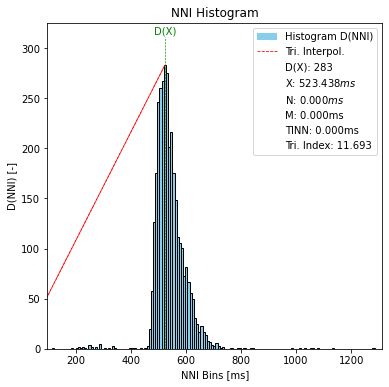

In [15]:
result_3 = td.time_domain(nni_3)

In [16]:
result_3['rmssd']

50.4797090701934

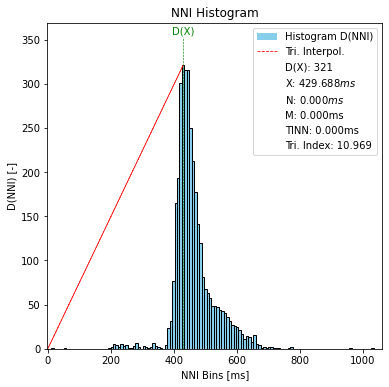

In [17]:
result_4 = td.time_domain(nni_4)

In [18]:
result_4['rmssd']

56.10217191144936

Гистограммы имеют вид гистограмм для человека не испытывающего стресс

(источник: https://www.vedapuls.ru/populyarno-o-bazovykh-printsipakh-variabelnosti-ritma-serdtsa)

Видим, RSSD максимальна для четвертого человека, что является еще одним поводом полагать, что четвертый человек самый здоровый.

## Таким образом, самый здоровый четвертый человек